In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plot

In [2]:
def subset(org_and_repo):
    org, repo = org_and_repo.split('/')
    return data.loc[(data.organization == org) & (data.repository == repo)]

def merge_repos(repos, metric='stargazers'):
    data = pd.DataFrame(columns=['Date'])
    for repo in repos:
        repo_data = subset(repo)
        repo_data = repo_data[['date', metric]].rename(columns={metric: repo, 'date': 'Date'})
        data = data.merge(repo_data, on='Date', how='outer')
    return data.sort_values(by='Date')

def plot_repos(title, repos, metric='stargazers'):
    plot_data = merge_repos(repos, metric)
    plot_data.plot(x='Date', y=repos, title=title, figsize=(15,10))

def plot_all_repos(title, org, metric='stargazers'):
    repo_data = data.loc[data.organization == org]
    repos = [org + '/' + repo for repo in repo_data.repository.unique()]
    plot_repos(title, repos, metric)

In [4]:
conn = sqlite3.connect('data-vol-1/github.db')
data = pd.read_sql_query("""
SELECT strftime('%Y-%m-01', date) AS date, organization, repository,
MAX(stargazers) AS stargazers, MAX(forks) AS forks
FROM github_stats
GROUP BY organization, repository, strftime('%Y-%m', date)
""", conn)

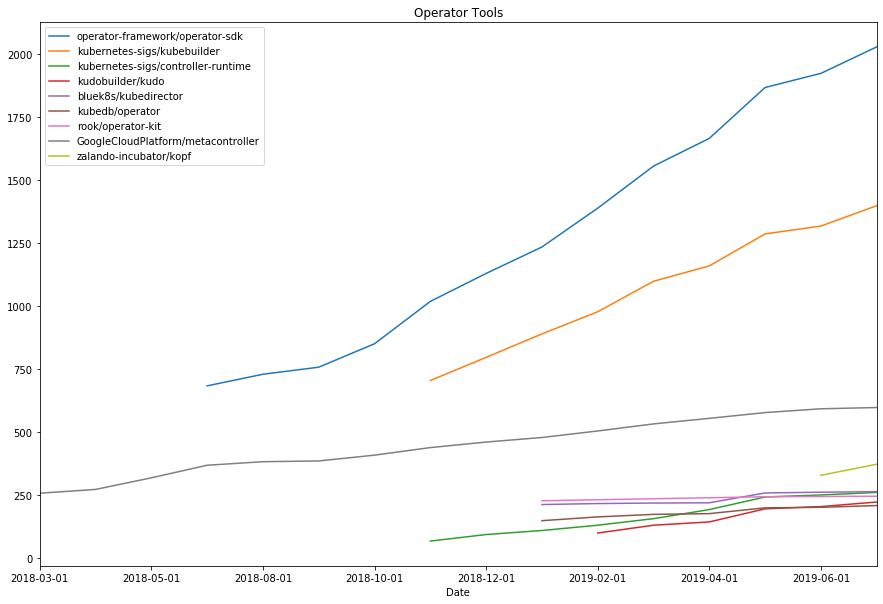

In [5]:
repos = [
    'operator-framework/operator-sdk',
    'kubernetes-sigs/kubebuilder',
    'kubernetes-sigs/controller-runtime',
    'kudobuilder/kudo',
    'bluek8s/kubedirector',
    'kubedb/operator',
    'rook/operator-kit',
    'GoogleCloudPlatform/metacontroller',
    'zalando-incubator/kopf'
]

plot_repos('Operator Tools', repos)

In [6]:
import requests
import re

r = requests.get('https://twitter.com/kudobuilder')
m = re.search('title="([0-9]+) Followers"', r.text)
followers = int(m.group(1))

cursor = conn.cursor()
cursor.execute('''INSERT INTO twitter_stats (date, followers) VALUES (date('now'), ?)''', (followers,))
conn.commit()

print("@kudobuilder has {} Twitter followers".format(followers))

@kudobuilder has 201 Twitter followers


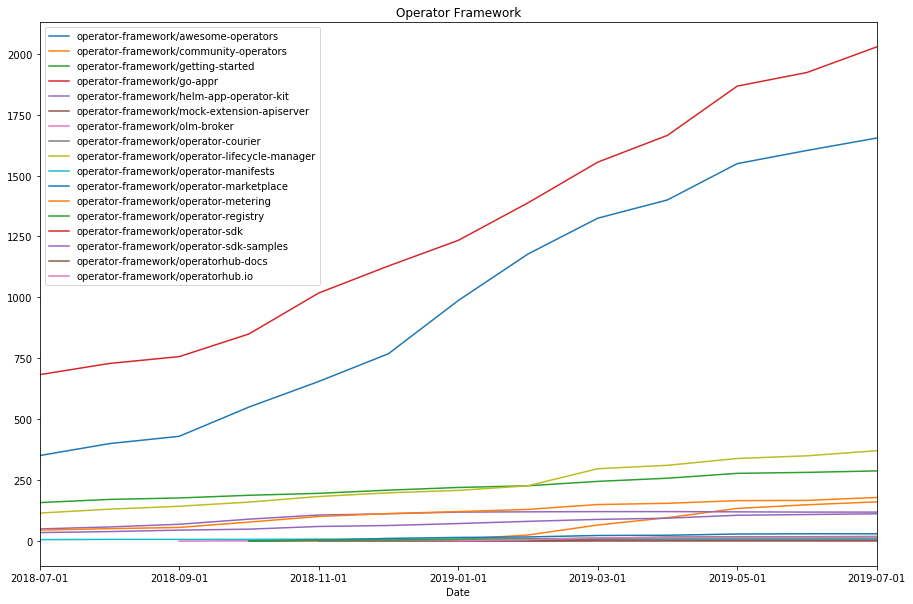

In [7]:
plot_all_repos('Operator Framework', 'operator-framework')

In [9]:
awesome_repo_names = [l.rstrip('\n') for l in open('data-vol-1/awesome_operators.txt').readlines()]

def name_and_stars(name):
    awesome_data = subset(name)
    max_stars = awesome_data['stargazers'].max()
    return (name, max_stars)

awesome_data = pd.DataFrame(map(name_and_stars, awesome_repo_names), columns=['repository', 'stargazers']).dropna()

n = 50
top_n_operators = awesome_data.sort_values(by='stargazers', ascending=False).head(n)
top_n_operators

,repository,stargazers
72,rook/rook,5485.0
11,jetstack/cert-manager,3730.0
60,coreos/prometheus-operator,3064.0
4,heptio/velero,2738.0
41,kubevirt/kubevirt,1373.0
21,coreos/etcd-operator,1142.0
36,strimzi/strimzi,759.0
57,CrunchyData/postgres-operator,694.0
78,kubeflow/tf-operator,686.0
83,coreos/vault-operator,644.0


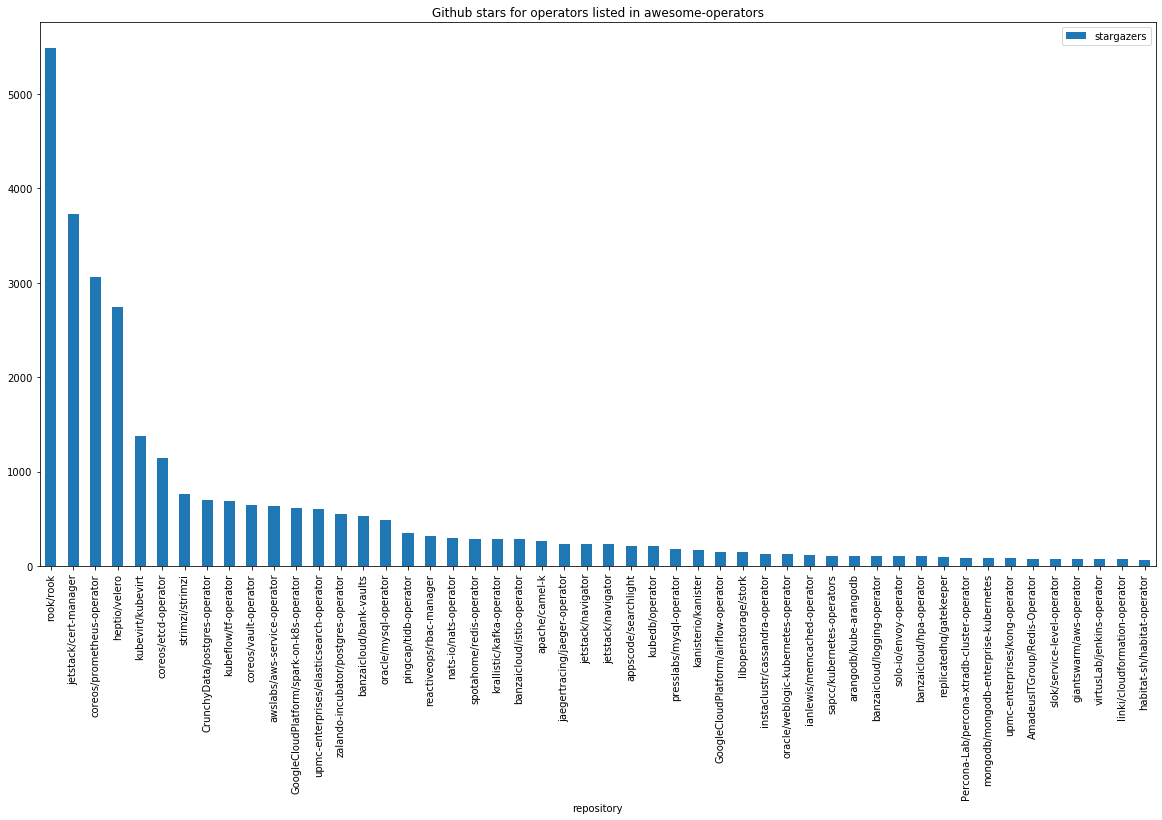

In [10]:
top_n_operators.plot(x='repository', y='stargazers', kind='bar', figsize=(20,10), title='Github stars for operators listed in awesome-operators')

In [11]:
repos = [
    'operator-framework/operator-sdk',
    'kubernetes-sigs/kubebuilder',
    'kudobuilder/kudo',
    'bluek8s/kubedirector',
    'kubedb/operator',
    'rook/operator-kit',
    'GoogleCloudPlatform/metacontroller',
    'zalando-incubator/kopf'
]

plot_data = merge_repos(repos, 'forks')
plot_data

,Date,operator-framework/operator-sdk,kubernetes-sigs/kubebuilder,kudobuilder/kudo,bluek8s/kubedirector,kubedb/operator,rook/operator-kit,GoogleCloudPlatform/metacontroller,zalando-incubator/kopf
13,2018-03-01,NaN,NaN,NaN,NaN,NaN,NaN,21,NaN
14,2018-04-01,NaN,NaN,NaN,NaN,NaN,NaN,22,NaN
15,2018-05-01,NaN,NaN,NaN,NaN,NaN,NaN,24,NaN
0,2018-07-01,102.0,NaN,NaN,NaN,NaN,NaN,33,NaN
1,2018-08-01,116.0,NaN,NaN,NaN,NaN,NaN,38,NaN
2,2018-09-01,121.0,NaN,NaN,NaN,NaN,NaN,39,NaN
3,2018-10-01,151.0,NaN,NaN,NaN,NaN,NaN,47,NaN
4,2018-11-01,196.0,111.0,NaN,NaN,NaN,NaN,50,NaN
5,2018-12-01,223.0,133.0,NaN,NaN,NaN,NaN,52,NaN
6,2019-01-01,251.0,148.0,NaN,27.0,8.0,37.0,58,NaN
